# IRIS Flower Classification ML Project

*This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.*

**Datasetlink** : http://archive.ics.uci.edu/ml/datasets/Iris

*Can use the same dataset from ```sklearn.datasets import load_iris()``` without downloading.*

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## Import IRIS-Dataset

In [2]:
data  = pd.read_csv('iris_data.csv')
data

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


## Data Preprocessing

In [3]:
data.isna().sum()

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [4]:
data = data.drop('Unnamed: 0', axis = 1)

In [5]:
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### About Data

In [8]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,2.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### Encoding

In [6]:
onehot = []

for i in data['Species']:
    if (i == 'setosa'):
        onehot.append(1)
    elif (i == 'virginica'):
        onehot.append(3)
    else:
        onehot.append(2)

In [7]:
data['Species'] = onehot    #There are many approaches to do Encoding, one used here is for simplicity
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


## Visualisation

### Count Plot

C:\Users\Sriniketh J\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


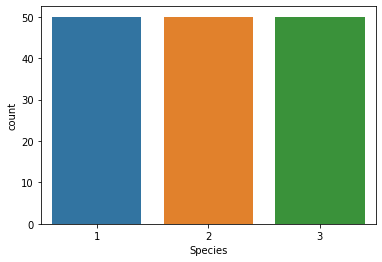

In [10]:
sns.countplot(data['Species'])
plt.show()

### Scatter Plot

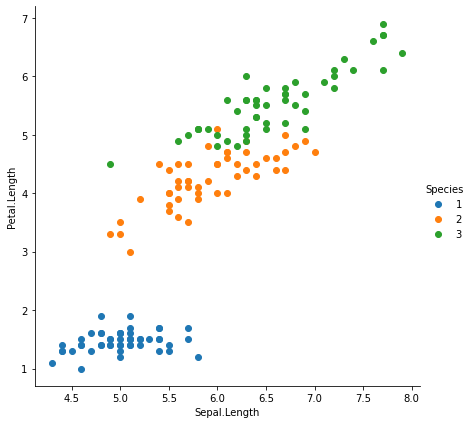

In [11]:
sns.FacetGrid(data, hue ="Species",height = 6).map(plt.scatter, 'Sepal.Length', 'Petal.Length').add_legend()
plt.show()

### Pair Plot

*Similar to Sub Plot*

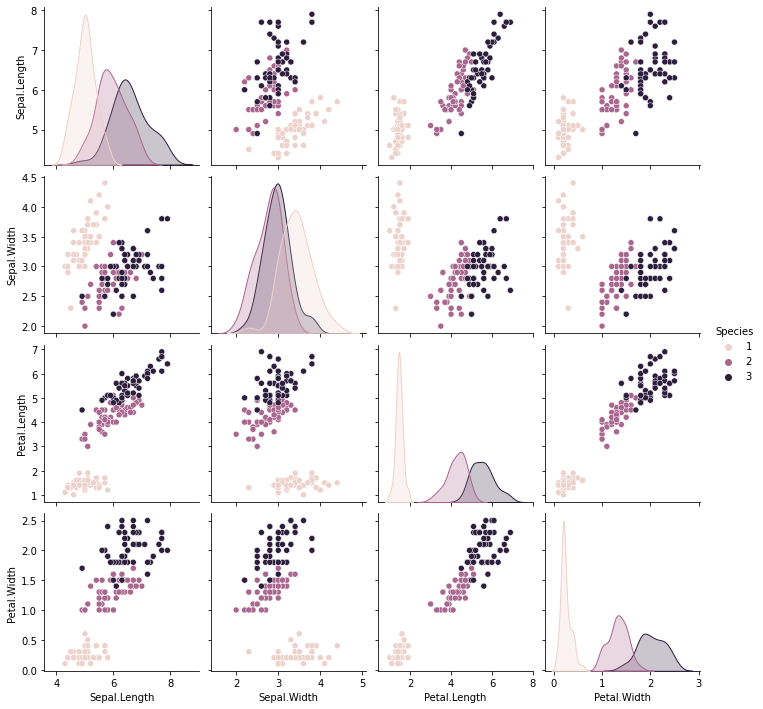

In [12]:
sns.pairplot(data, hue="Species")
plt.show()

## Model Building

In [13]:
X = data.iloc[ : , : 4]
y = pd.DataFrame(data['Species'])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Logistic Regression Model

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X_train, y_train)

C:\Users\Sriniketh J\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Sriniketh J\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
model.fit(X_train, y_train)

C:\Users\Sriniketh J\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Sriniketh J\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


#### Accuracy Score | Logistic Regression

In [19]:
pred_log = model.predict(X_test)
acc_log = accuracy_score(pred_log, y_test)
acc_log*100

97.36842105263158

#### Logistic Regression | Prediction

In [20]:
prediction = int(model.predict(X_new))

if (prediction == 1):
    print('Species: Setosa')
elif (prediction == 2):
    print('Species: Versicolor')
else:
    print('Species: Virginica')

Species: Setosa


### KNN-Neighbours

#### KNN | Model

In [21]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

<ipython-input-21-353ddaec9488>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

#### KNN | Accuracy Score

In [22]:
knn_pred = knn.predict(X_test)
acc_knn = accuracy_score(y_test, knn_pred)
acc_knn * 100

97.36842105263158

#### KNN | Classification Report

In [23]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.94      0.97        16
           3       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



#### KNN | Confusion Matrix

In [24]:
print(confusion_matrix(y_test, knn_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


#### KNN | Prediction

In [25]:
prediction = int(knn.predict(X_new))

if (prediction == 1):
    print('Species: Setosa')
elif (prediction == 2):
    print('Species: Versicolor')
else:    print('Species: Virginica')

Species: Setosa


### Decision Tree Classifier

In [26]:
clf_tree =  DecisionTreeClassifier(criterion= 'gini')

clf_tree.fit(X_train, y_train)

DecisionTreeClassifier()

#### Decision Tree | Visualiser

In [27]:
prediction = int(clf_tree.predict(X_new))

if (prediction == 1):
    print('Species: Setosa')
elif (prediction == 2):
    print('Species: Versicolor')
else:    print('Species: Virginica')

Species: Setosa


### Decision Tree Visualizer

In [28]:
param_grid = {'max_depth': np.arange(2, 8),'max_features': np.arange(2,5)}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
tree.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 165 out of 180 | elapsed:    2.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    2.8s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
             verbose=1)

### Decision Tree | Accuracy Score

In [29]:
print(tree.best_score_ * 100)
print(tree.best_estimator_)

98.18181818181819
DecisionTreeClassifier(max_depth=3, max_features=4)


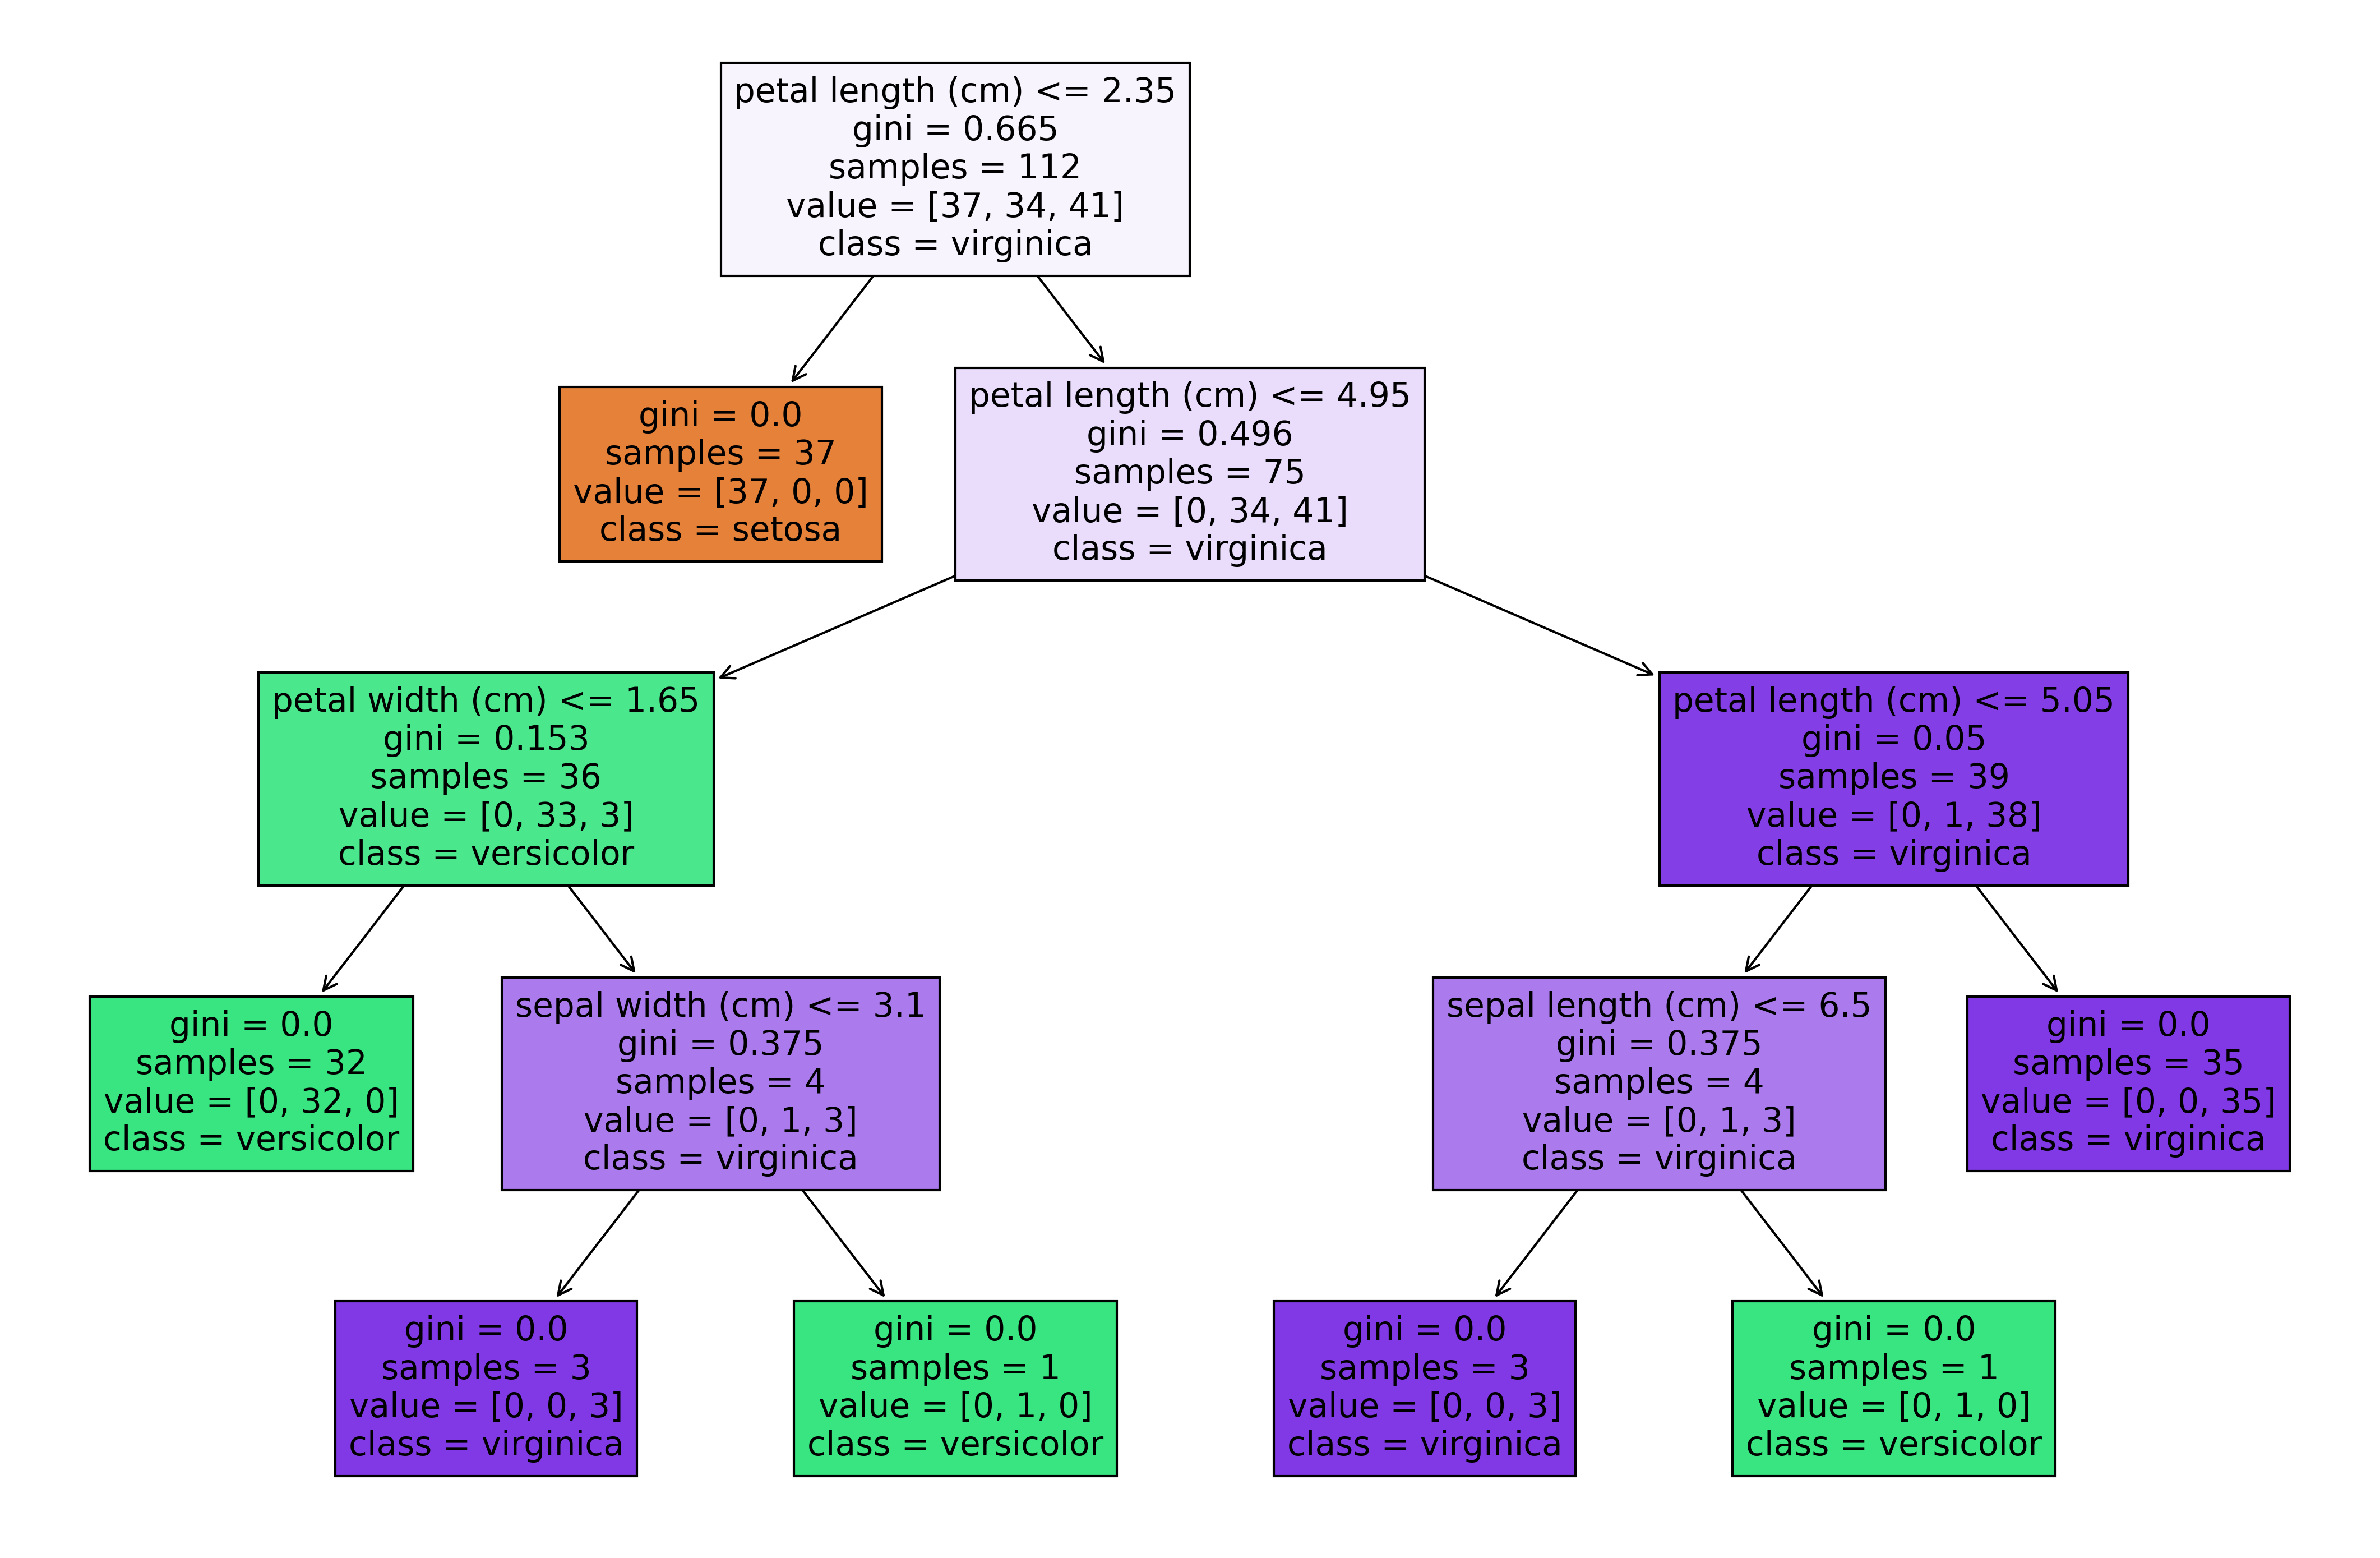

In [30]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (18,12), dpi=300)
tree.plot_tree(clf_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);

## Conclusion

<table>
    <tr>
        <th><u>Model Name</u></th>
        <th><u>Accuracy Score</u></th>
    </tr>
    <tr>
        <th>Logistic Regression</th>
        <th>97.36842105263158</th>
    </tr>
    <tr>
        <th>K-Nearest Neighbours</th>
        <th>97.36842105263158</th>
    </tr>
    <tr>
        <th>Decision Tree</th>
        <th>98. 18181818181819</th>
    </tr>
</table>

<br>
<hr>

> **Note - 1:** *Results may vary if random state or hyperparameter or some other changes occur.*

> **Note  - 2:** *Logistic Regreesion and KNN Model Perform with the same Accuracy.*

### **Preffered: Decision Tree Classifier (Accuracy: 98.18%)**